# Compairing QTLs for Tomato fruit shape & Potato tuber shape on Chromosome 10

*Gurnoor Singh, Arnold*

<div class=text-justify>
Reference tomato have a round fruit shape, while reference potatoes have an elongated tuber shape. Recently published article ( <a href="https://dx.doi.org/10.1038%2Fs41467-018-07216-8">DOI:10.1038/s41467-018-07216-8</a>) reveals that the presence of SLOFP20 on chromosome 10 of tomatoes is responsible for the roundness in fruit shape. However, there is no ortholog of this SLOFP20 in the reference potato DM, and this contributes to elongated tuber. In our python application we map the QTL regions in both tomato and potato, to check how well genes in both the QTL map. Consequently,  we classify genes into 3 categories, genes that occur both in tomato and potato, gene that are unique in tomato, and genes that are unique in potato. Further, we query the GO annotations in every class to see if there is any difference in GO annotations based on classes. This to find a uniqueness of every gene class.

Lastly, we summaries all the properties of the gene SLOFP20 from SGN, Uniprot and Ensembleplants database. 
</div>


Potato markers in the region pPt-458713 and pPt-473367 where as Tomato markers in the region are solcap_snp_sl_26447 and  gene188_0-i21

## Initialization

In [1]:
import orthologs
from IPython.display import Image,SVG
search = orthologs.SEARCH("http://pbg-ld.candygene-nlesc.surf-hosted.nl:8890/sparql")

QTL for fruit shape in tomatoes on chromosome 10 is marked by the genes Solyc10g075170 and Solyc10g076240. Similarly QTL for tuber shape in potatoes on chromosome 10 is marked by the genes PGSC0003DMG400006678 and PGSC0003DMG400020801.


In [2]:
#potato
pg1 = "PGSC0003DMG400006678"
pg2 = "PGSC0003DMG400020801"
#tomato
tg1 = "Solyc10g075170.1"
tg2 = "Solyc10g076240.1"


## Tomato

### Find co-ordinates of the QTL interval
Search locations of genes, and compute interval

In [3]:
intervalT = search.compute_interval(tg1, tg2)

,location
gene_id,
Solyc10g075170.1,chromosome 10:58891402-58895882
Solyc10g076240.1,chromosome 10:59082990-59084119


### List the candidate genes inside this QTL interval and search potato orthologs
List genes and potato orthologs inside this interval

In [4]:
genesT = search.interval_genes(intervalT)
aggregations = { "ortholog_gene_id" : ["nunique"]}
display(genesT.groupby(["gene_id"]).agg(aggregations))

,ortholog_gene_id
,nunique
gene_id,
Solyc10g076170.1,0
Solyc10g076180.1,0
Solyc10g076190.1,1
Solyc10g076200.1,2
Solyc10g076210.1,2
Solyc10g076220.1,2
Solyc10g076230.1,1


### List orthologs
List orthologs for the genes found in the interval

In [21]:
#df2=genesT[["location","ortholog_gene_id","ortholog_location"]].groupby(["gene_id"])
#df2.describe()
import pandas as pd
index=pd.MultiIndex.from_tuples([tuple(x) for x in genesT[["location","ensembl_gene_id", "ortholog_gene_id"]].to_records()], names=["gene_id", "location", "ensembl_gene_id", "ortholog_gene_id"])
display(genesT.set_index(index)[["ortholog_location"]])             

ortholog_location
gene_id          location                        ensembl_gene_id  ortholog_gene_id                                        
Solyc10g076170.1 chromosome 10:58981351-58981887 Solyc10g076170.1 NaN                   None                              
Solyc10g076180.1 chromosome 10:59006329-59007294 Solyc10g076180.1 NaN                   None                              
Solyc10g076190.1 chromosome 10:59045991-59047132 Solyc10g076190.1 PGSC0003DMG400011948  chromosome 00:22142391-22143721:1 
Solyc10g076200.1 chromosome 10:59051770-59052216 Solyc10g076200.1 PGSC0003DMG400011955  chromosome 00:22145065-22146428:-1
                                                                  PGSC0003DMG400040954  chromosome 10:49170543-49171657:1 
Solyc10g076210.1 chromosome 10:59054478-59055612 Solyc10g076210.1 PGSC0003DMG400020800  chromosome 10:49084193-49085040:-1
                                                                  PGSC0003DMG400020799  chromosome 10:49151461-49152451:-1
Solyc10g076220.1 chromosome 10:59059828-59060961 Solyc10g076220.1 PGSC0003DMG400020800  chromosome 10:49084193-49085040:-1
                                                                  PGSC0003DMG400020799  chromosome 10:49151461-49152451:-1
Solyc10g076230.1 chromosome 10:59074041-59074647 Solyc10g076230.1 PGSC0003DMG400020798  chromosome 10:49172630-49173264:-1

### Chromosomes for orthologs
Chromosomes containing the found orthologs

In [6]:
kauraggregations = {"ortholog_begin_pos" : ["min","max"], "ortholog_end_pos" : ["min","max"]}
display(genesT.groupby(["ortholog_begin_ref"]).agg(aggregations))

,ortholog_gene_id
,nunique
ortholog_begin_ref,
http://rdf.ebi.ac.uk/resource/ensembl/33/solanum_tuberosum/SolTub_3.0/00,2
http://rdf.ebi.ac.uk/resource/ensembl/33/solanum_tuberosum/SolTub_3.0/10,4


### Diagram crosslinks
Create a diagram with crosslinks between found genes and orthologs

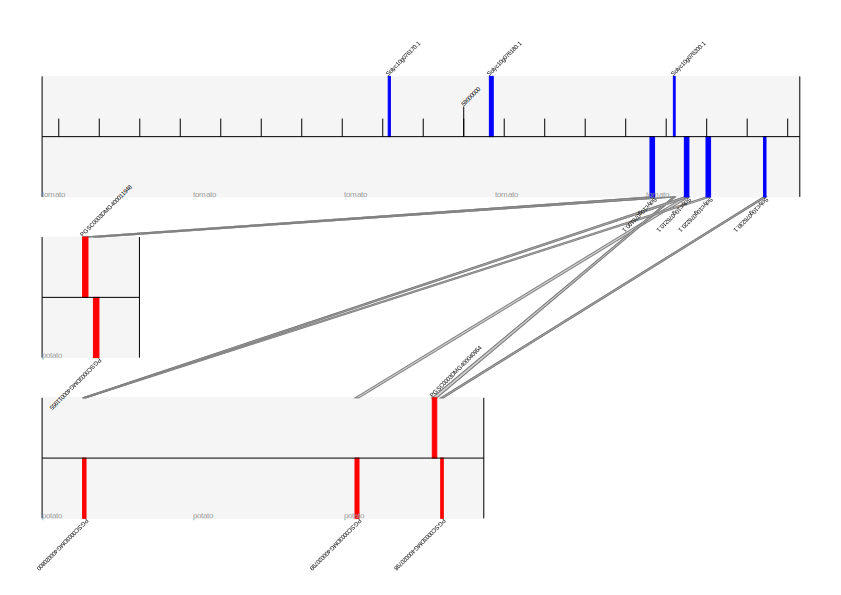

In [7]:
genesTdiagram = search.diagram_crosslinks("tomato", "potato", intervalT, genesT)
tmpFilename = "tomato_"+pg1+"-"+pg2+"_crosslinks.svg"
genesTdiagram.write(tmpFilename, "svg")
SVG(tmpFilename)

## Potato
### Find interval
Find locations for genes, and compute interval

In [8]:
intervalP = search.compute_interval(pg1, pg2)

,location
gene_id,
PGSC0003DMG400006678,chromosome 10:48978066-48982521
PGSC0003DMG400020801,chromosome 10:49258672-49260078


### Find genes and orthologs
Find genes and orthologs for interval

In [9]:
genesP = search.interval_genes(intervalP)
aggregations = {"ensembl_gene_id" : ["nunique"], "ortholog_gene_id" : ["nunique"]}
display(genesT.groupby(["gene_id"]).agg(aggregations))

,ensembl_gene_id,ortholog_gene_id
,nunique,nunique
gene_id,,
Solyc10g076170.1,1,0
Solyc10g076180.1,1,0
Solyc10g076190.1,1,1
Solyc10g076200.1,1,2
Solyc10g076210.1,1,2
Solyc10g076220.1,1,2
Solyc10g076230.1,1,1


### List orthologs
List orthologs for the genes found in the interval

In [10]:
#display(genesP[["location","ensembl_gene_id","ortholog_gene_id","ortholog_location"]])
import pandas as pd
index=pd.MultiIndex.from_tuples([tuple(x) for x in genesP[["location","ensembl_gene_id", "ortholog_gene_id"]].to_records()], names=["gene_id", "location", "ensembl_gene_id", "ortholog_gene_id"])
display(genesP.set_index(index)[["ortholog_location"]])

ortholog_location
gene_id              location                        ensembl_gene_id      ortholog_gene_id                                    
PGSC0003DMG400006679 chromosome 10:49022687-49023709 PGSC0003DMG400006679 NaN               None                              
PGSC0003DMG400006680 chromosome 10:49040786-49046010 PGSC0003DMG400006680 NaN               None                              
PGSC0003DMG400006681 chromosome 10:49064472-49065184 PGSC0003DMG400006681 NaN               None                              
PGSC0003DMG400020800 chromosome 10:49084193-49085040 PGSC0003DMG400020800 Solyc10g076210.1  chromosome 10:59054478-59055612:-1
                                                                          Solyc10g076220.1  chromosome 10:59059828-59060961:-1
PGSC0003DMG400045482 chromosome 10:49092329-49093552 PGSC0003DMG400045482 NaN               None                              
PGSC0003DMG400040544 chromosome 10:49108641-49111957 PGSC0003DMG400040544 Solyc01g066890.1  chromosome 1:75142075-75142941:-1 
                                                                          Solyc07g041360.1  chromosome 7:52534390-52534818:-1 
PGSC0003DMG400020799 chromosome 10:49151461-49152451 PGSC0003DMG400020799 Solyc10g076210.1  chromosome 10:59054478-59055612:-1
                                                                          Solyc10g076220.1  chromosome 10:59059828-59060961:-1
PGSC0003DMG400040954 chromosome 10:49170543-49171657 PGSC0003DMG400040954 Solyc10g076200.1  chromosome 10:59051770-59052216:1 
PGSC0003DMG400020798 chromosome 10:49172630-49173264 PGSC0003DMG400020798 Solyc10g076230.1  chromosome 10:59074041-59074647:-1
                                                                          Solyc10g075120.1  chromosome 10:58847992-58848834:1 
PGSC0003DMG400035649 chromosome 10:49174387-49174710 PGSC0003DMG400035649 NaN               None                              
PGSC0003DMG400020797 chromosome 10:49199138-49201970 PGSC0003DMG400020797 NaN               None                              
PGSC0003DMG400039458 chromosome 10:49235999-49240574 PGSC0003DMG400039458 NaN               None                              
PGSC0003DMG400020795 chromosome 10:49247297-49254377 PGSC0003DMG400020795 NaN               None

### Chromosomes for orthologs
Chromosomes containing the found orthologs

In [11]:
aggregations = {"ortholog_begin_pos" : ["min","max"], "ortholog_end_pos" : ["min","max"]}
display(genesP.groupby(["ortholog_begin_ref"]).agg(aggregations))

ortholog_begin_pos  \
                                                                                       min   
ortholog_begin_ref                                                                           
http://rdf.ebi.ac.uk/resource/ensembl/33/solanum_lycopersicum/SL2.50/1   75142941.0          
http://rdf.ebi.ac.uk/resource/ensembl/33/solanum_lycopersicum/SL2.50/10  58847992.0          
http://rdf.ebi.ac.uk/resource/ensembl/33/solanum_lycopersicum/SL2.50/7   52534818.0          

                                                                                     \
                                                                                max   
ortholog_begin_ref                                                                    
http://rdf.ebi.ac.uk/resource/ensembl/33/solanum_lycopersicum/SL2.50/1   75142941.0   
http://rdf.ebi.ac.uk/resource/ensembl/33/solanum_lycopersicum/SL2.50/10  59074647.0   
http://rdf.ebi.ac.uk/resource/ensembl/33/solanum_lycopersicum/SL2.50/7   52534818.0   

                                                                        ortholog_end_pos  \
                                                                                     min   
ortholog_begin_ref                                                                         
http://rdf.ebi.ac.uk/resource/ensembl/33/solanum_lycopersicum/SL2.50/1   75142075.0        
http://rdf.ebi.ac.uk/resource/ensembl/33/solanum_lycopersicum/SL2.50/10  58848834.0        
http://rdf.ebi.ac.uk/resource/ensembl/33/solanum_lycopersicum/SL2.50/7   52534390.0        

                                                                                     
                                                                                max  
ortholog_begin_ref                                                                   
http://rdf.ebi.ac.uk/resource/ensembl/33/solanum_lycopersicum/SL2.50/1   75142075.0  
http://rdf.ebi.ac.uk/resource/ensembl/33/solanum_lycopersicum/SL2.50/10  59074041.0  
http://rdf.ebi.ac.uk/resource/ensembl/33/solanum_lycopersicum/SL2.50/7   52534390.0

### Diagram crosslinks
Create a diagram with crosslinks between found genes and orthologs

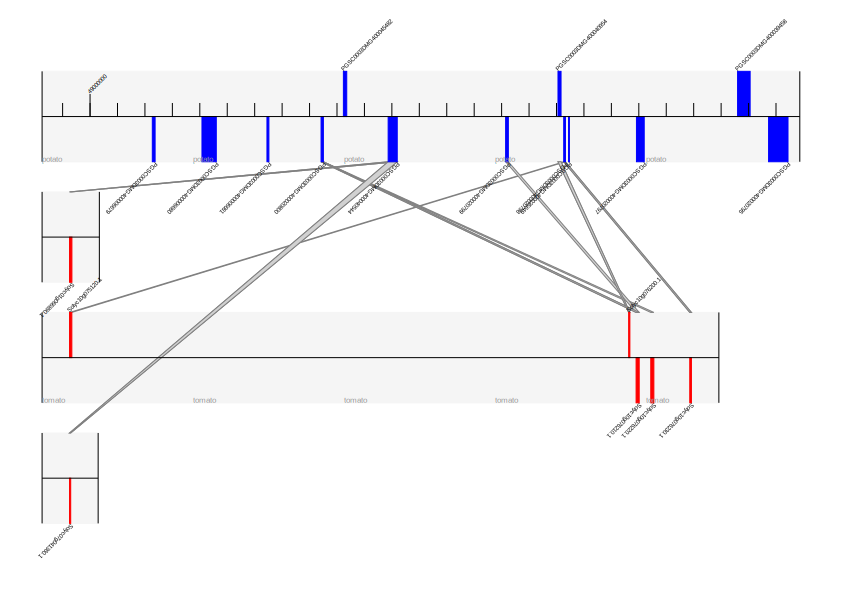

In [12]:
genesPdiagram = search.diagram_crosslinks("potato", "tomato", intervalP, genesP)
tmpFilename = "potato_"+tg1+"-"+tg2+".svg"
genesPdiagram.write(tmpFilename, "svg")
SVG(tmpFilename)

# Annotations
Compare GO annotatios in all three classes

Genes, orthologs for potato and tomato and annotations

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

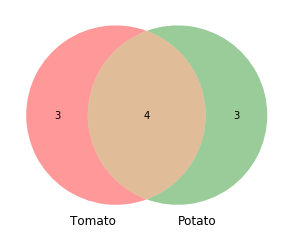

In [14]:
setp1 = genesP["ortholog_gene_id"].dropna().unique()
setp2 = genesT.index.unique()
setp3 = setp2 & setp1
setp1 = list(set(setp1)-set(setp3))
setp2 = list(set(setp2)-set(setp3))
venn2(subsets = (len(setp1), len(setp2), len(setp3)), set_labels = ("Tomato", "Potato"))
plt.show()


## Only in Potato interval

In [15]:
print(*setp1, sep = "\n")

Solyc01g066890.1
Solyc10g075120.1
Solyc07g041360.1


In [16]:
termp1 = search.gene_annotations(setp1)["term"].dropna().unique()
print(*termp1, sep = "\n")

peroxidase activity
response to oxidative stress
heme binding


## Inside both tomatoes and Potatoes

In [17]:
print(*setp3, sep = "\n")

Solyc10g076200.1
Solyc10g076210.1
Solyc10g076220.1
Solyc10g076230.1


In [18]:
termp3 = search.gene_annotations(setp3)["term"].dropna().unique()
print(*termp3, sep = "\n")

peroxidase activity
extracellular region
lipid transport
response to oxidative stress
lipid binding
metal ion binding
heme binding
hydrogen peroxide catabolic process


## Only in tomato interval

In [19]:
print(*setp2, sep = "\n")

Solyc10g076190.1
Solyc10g076180.1
Solyc10g076170.1


In [20]:
termp2 = search.gene_annotations(setp2)["term"].dropna().unique()
print(*termp2, sep = "\n")

DNA binding
peroxidase activity
extracellular region
response to oxidative stress
negative regulation of transcription, DNA-templated
metal ion binding
heme binding
hydrogen peroxide catabolic process


## Exploring the Annotations of Gene *Solyc10g076180.1*

- GO Annotation
- PPI 
- STRING
- KEGG
- ALL Orthologs
- Species with no Orthologs